# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

## Regression Model Evaluation

In [2]:
import sklearn
print(sklearn.__version__)

1.3.0


In [3]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [4]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
from sklearn.model_selection import train_test_split as tts

In [6]:
X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       train_size=0.80
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [7]:
from sklearn.linear_model import LinearRegression as LinReg 

In [8]:
linreg = LinReg()

linreg.fit(X_train, y_train)

y_pred_test = linreg.predict(X_test)
y_pred_train = linreg.predict(X_train)

y_pred_test[:5], y_pred_train[:5]

(array([[ 2.08557944],
        [-0.05944604],
        [ 1.71075139],
        [ 0.64000239],
        [ 0.95130872]]),
 array([[2.02447194],
        [2.34426867],
        [0.18384823],
        [2.72755359],
        [3.09209987]]))

## 3. Calculate and print R-squared for both the training and the testing set.

In [9]:
from sklearn.metrics import r2_score as r2

In [10]:
r2(y_test, y_pred_test)

0.5994681175163821

In [11]:
r2(y_train, y_pred_train)

0.6059968456491056

## 4. Calculate and print mean squared error for both the training and the testing set.

In [12]:
from sklearn.metrics import mean_squared_error as mse

In [13]:
mse(y_test, y_pred_test)

0.541007663380347

In [14]:
mse(y_train, y_pred_train)

0.522715107011859

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [15]:
from sklearn.metrics import mean_absolute_error as mae

In [16]:
mae(y_test,y_pred_test)

0.528645841915242

In [17]:
mae(y_train,y_pred_train)

0.5297342536513102

## Classification Model Evaluation

In [18]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [19]:
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [20]:
X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       train_size=0.80
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [22]:
from sklearn.linear_model import LogisticRegression as LogReg

In [23]:
logreg = LogReg()

logreg.fit(X_train, y_train)

y_pred_logreg_test = logreg.predict(X_test)
y_pred_logreg_train = logreg.predict(X_train)

y_prob = logreg.predict_proba(X_test)

y_pred_logreg_test[:5], y_pred_logreg_train[:5]

(array([0, 2, 0, 2, 0]), array([0, 0, 1, 2, 1]))

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [27]:
from sklearn.metrics import accuracy_score as acc

In [28]:
acc(y_test, y_pred_logreg_test)

0.9666666666666667

In [29]:
acc(y_train, y_pred_logreg_train)

0.975

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [30]:
from sklearn.metrics import balanced_accuracy_score

In [31]:
balanced_accuracy_score(y_test,y_pred_logreg_test)

0.9523809523809524

In [32]:
balanced_accuracy_score(y_train,y_pred_logreg_train)

0.9763660427301947

## 10. Calculate and print the precision score for both the training and the testing set.

In [33]:
from sklearn.metrics import precision_score as prec

In [40]:
prec(y_test, y_pred_logreg_test, average='weighted')

0.9700000000000001

In [44]:
prec(y_train, y_pred_logreg_train, average='weighted')

0.9751984126984127

## 11. Calculate and print the recall score for both the training and the testing set.

In [45]:
from sklearn.metrics import recall_score as rec

In [51]:
rec(y_test, y_pred_logreg_test, average='weighted')

0.9666666666666667

In [52]:
rec(y_train, y_pred_logreg_train, average='weighted')

0.975

## 12. Calculate and print the F1 score for both the training and the testing set.

In [60]:
from sklearn.metrics import f1_score as f1

In [64]:
f1(y_test, y_pred_logreg_test, average='micro')

0.9666666666666667

In [65]:
f1(y_train, y_pred_logreg_train, average='micro')

0.975

## 13. Generate confusion matrices for both the training and the testing set.

In [72]:
from sklearn.metrics import confusion_matrix as cm

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [78]:
cm(y_test, y_pred_logreg_test)/cm(y_test, y_pred_logreg_test).sum()*100

array([[46.66666667,  0.        ,  0.        ],
       [ 0.        , 20.        ,  3.33333333],
       [ 0.        ,  0.        , 30.        ]])

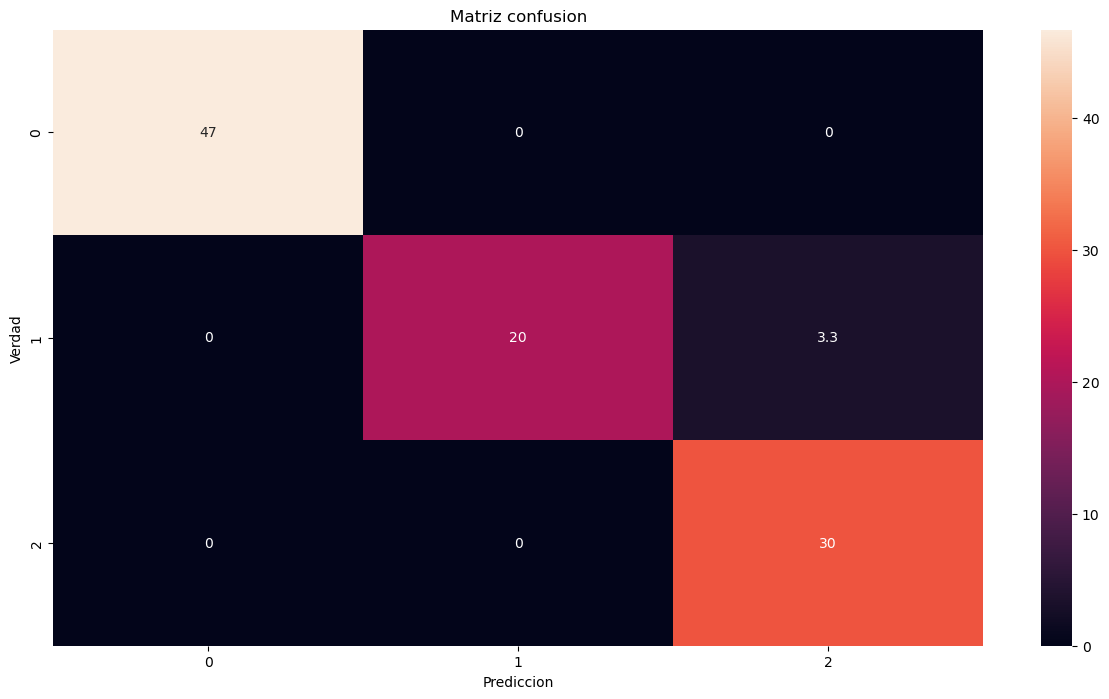

In [79]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_logreg_test)/cm(y_test, y_pred_logreg_test).sum() * 100, 
               annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [80]:
cm(y_train, y_pred_logreg_train)/cm(y_train, y_pred_logreg_train).sum()*100

array([[30.        ,  0.        ,  0.        ],
       [ 0.        , 34.16666667,  1.66666667],
       [ 0.        ,  0.83333333, 33.33333333]])

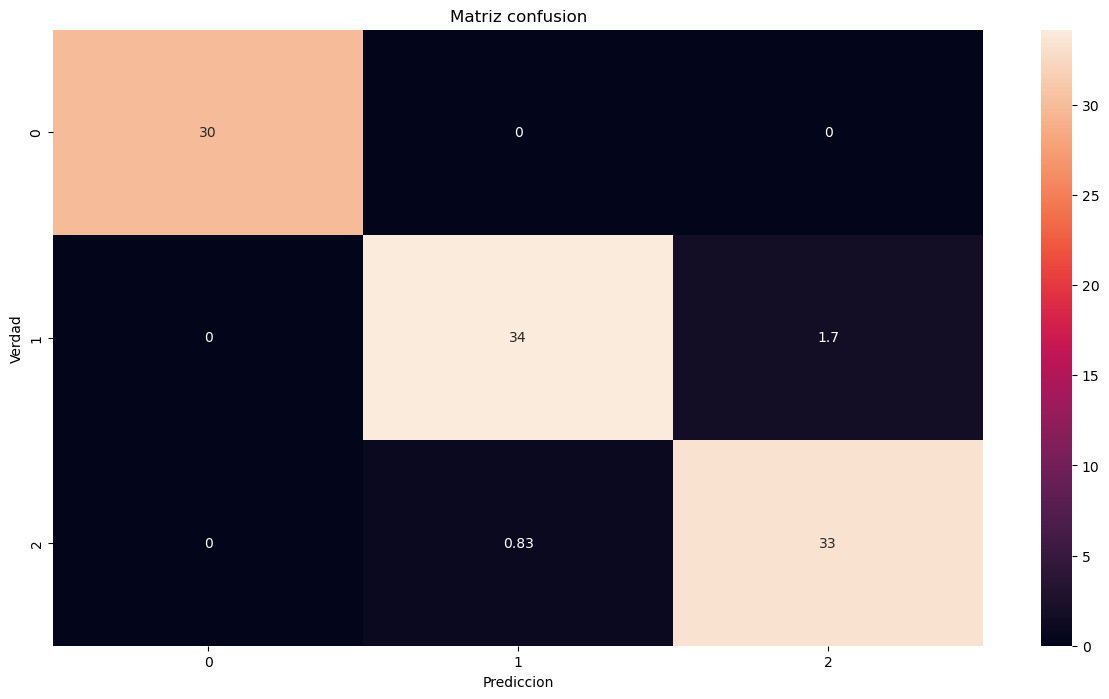

In [81]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred_logreg_train)/cm(y_train, y_pred_logreg_train).sum()*100, 
               annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.